## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.03096099],
       [0.06702272],
       [0.39956978],
       [0.50977055],
       [0.51715241]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.03095604,  0.06697255,  0.38902204,  0.48797698,  0.49440693,
        0.51626028,  0.78007572,  0.89747691,  0.96048982,  0.96384944,
        0.96679058,  0.96856367,  0.98261429,  0.99746107,  0.99954369,
        0.99924057,  0.99459936,  0.97593493,  0.96764542,  0.96725864,
        0.8616629 ,  0.42287764,  0.38276382,  0.32174366,  0.17447414,
        0.05248278,  0.00914146, -0.01490949, -0.01578141, -0.10324908,
       -0.15824763, -0.27881851, -0.43092913, -0.45824993, -0.51989203,
       -0.74723434, -0.93425996, -0.9980194 , -0.97919509, -0.96073211])

In [5]:
np.sin( X )[:5]

array([[0.03095604],
       [0.06697255],
       [0.38902204],
       [0.48797698],
       [0.49440693]])

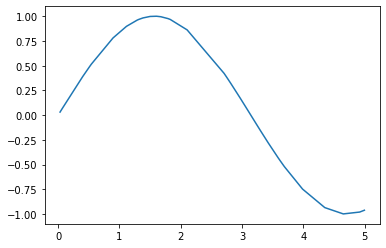

In [6]:
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

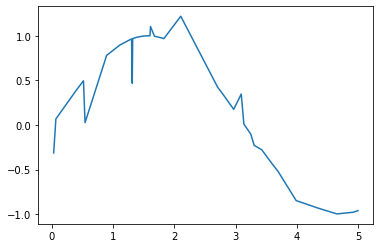

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

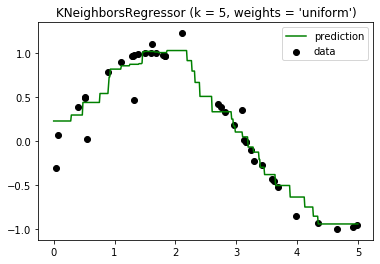

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

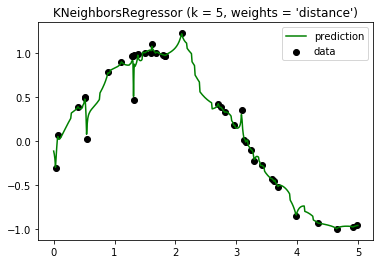

In [14]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()